In [5]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

from pandas_datareader import DataReader
from datetime import datetime
from __future__ import division

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [7]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [10]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-29,1289.270020,1266.295044,1274.000000,1287.579956,2499400,1287.579956
2019-04-30,1192.810059,1175.000000,1185.000000,1188.479980,6207000,1188.479980
2019-05-01,1188.050049,1167.180054,1188.050049,1168.079956,2639200,1168.079956
2019-05-02,1174.189941,1155.001953,1167.760010,1162.609985,1944800,1162.609985
2019-05-03,1186.800049,1169.000000,1173.650024,1185.400024,1980700,1185.400024


In [11]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,246.444585,240.909411,243.363082,243.893873,3.343121e+07,242.888988
std,43.226500,41.996538,42.496465,42.844970,1.728843e+07,43.380085
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,206.979996,203.500000,204.399994,205.210007,2.184000e+07,203.338760
50%,244.800003,237.119995,240.339996,240.910004,2.836480e+07,240.910004
75%,281.220001,272.959991,277.140015,276.929993,3.813280e+07,276.929993
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-04-29 to 2020-04-28
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


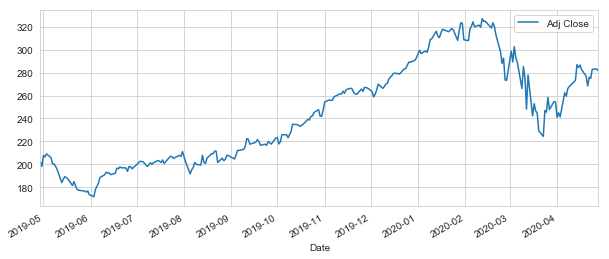

In [15]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

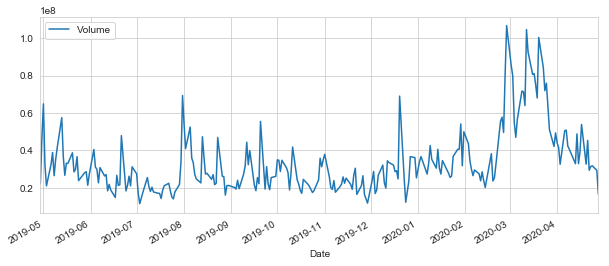

In [16]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [17]:
ma_day = [10, 20, 50]

In [56]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

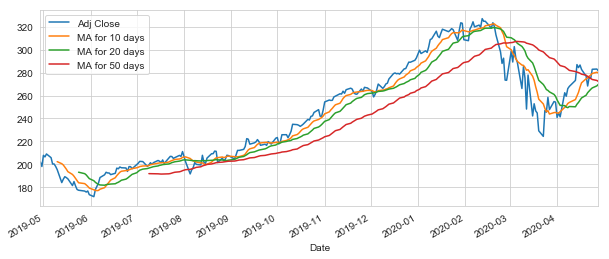

In [57]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(10,4))

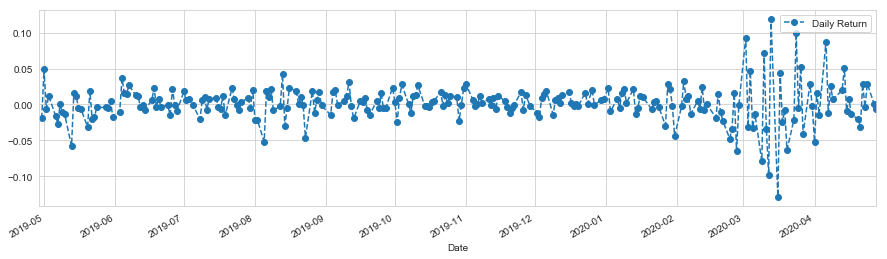

In [61]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(15,4), legend=True, linestyle='--', marker='o')

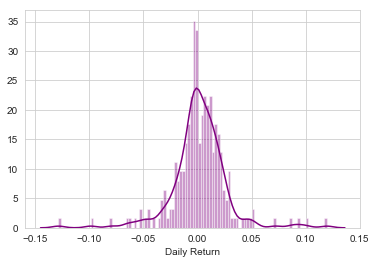

In [62]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

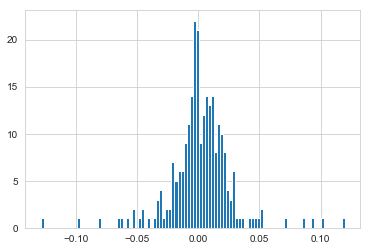

In [64]:
AAPL['Daily Return'].hist(bins=100)

In [69]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [70]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-29,201.966461,1938.430054,1287.579956,128.075485
2019-04-30,198.077362,1926.520020,1188.479980,128.894653
2019-05-01,207.800110,1911.520020,1168.079956,126.210159
2019-05-02,206.447800,1900.819946,1162.609985,124.561966
2019-05-03,209.014221,1962.459961,1185.400024,127.216843


In [71]:
tech_rets = closing_df.pct_change()

In [72]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-29,NaN,NaN,NaN,NaN
2019-04-30,-0.019256,-0.006144,-0.076966,0.006396
2019-05-01,0.049086,-0.007786,-0.017165,-0.020827
2019-05-02,-0.006508,-0.005598,-0.004683,-0.013059
2019-05-03,0.012431,0.032428,0.019602,0.021314


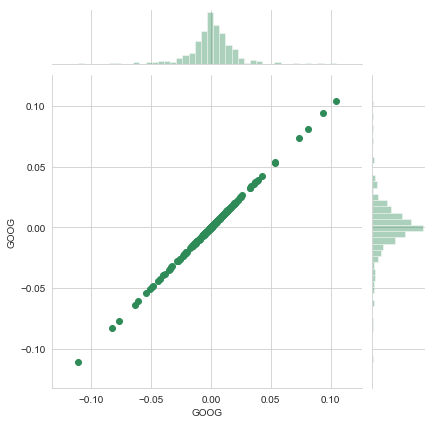

In [76]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

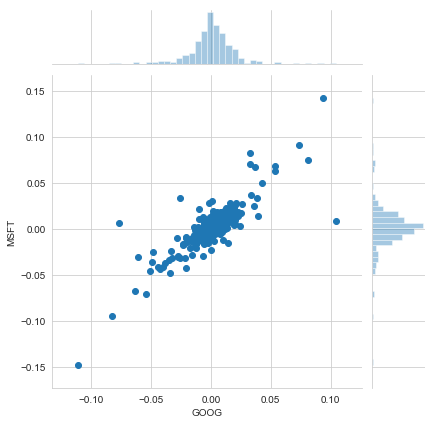

In [79]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

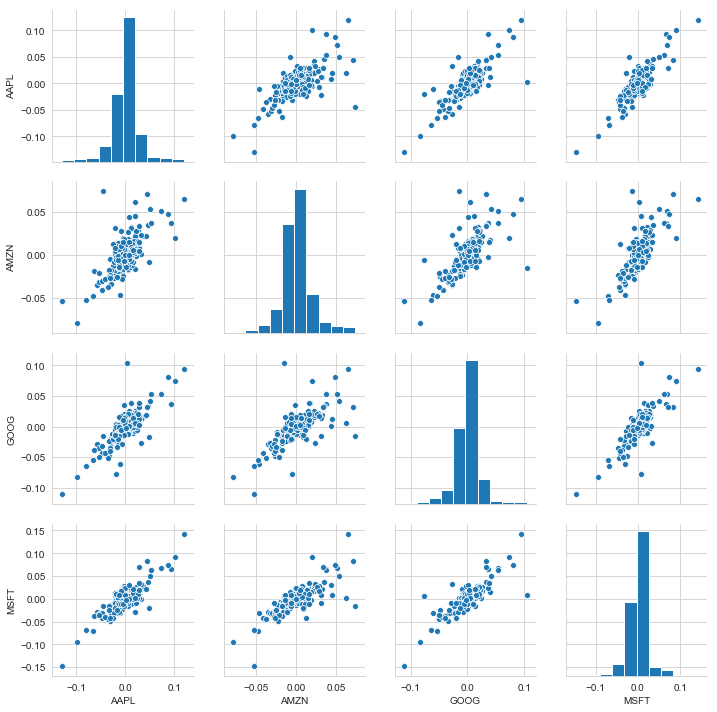

In [80]:
sns.pairplot(tech_rets.dropna())

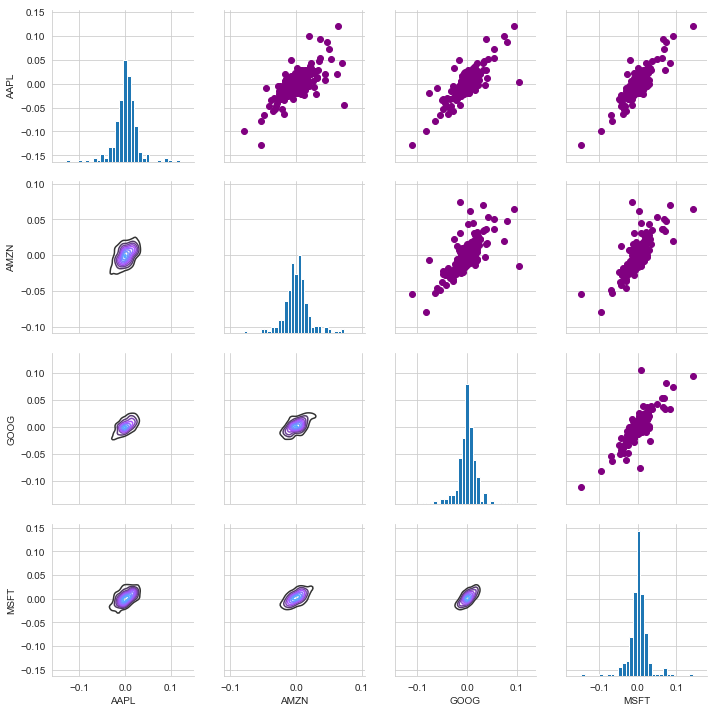

In [83]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

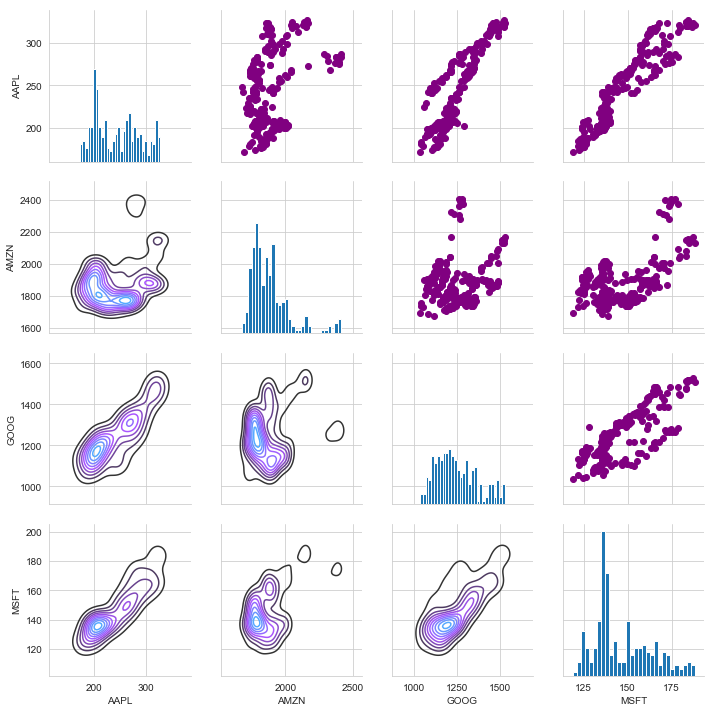

In [84]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

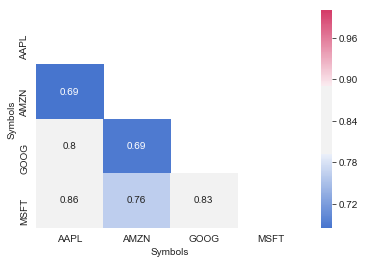

In [89]:
corr = tech_rets.dropna().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=sns.diverging_palette(256, 0, sep=80, n=7, as_cmap=True), annot=True, mask=mask)

In [112]:
def draw_corrplot(input_df):
    corr = input_df.dropna().corr()
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots()

    # Draw the heatmap with the mask and correct aspect ratio
    vmax = np.abs(corr.values[~mask]).max()
    sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
                square=True, linecolor="lightgray", linewidths=1, ax=ax)

    for i in range(len(corr)):
        ax.text(i+0.5, i+0.5, corr.columns[i], 
                ha="center", va="center", rotation=45)
        for j in range(i+1, len(corr)):
            s = "{:.3f}".format(corr.values[i,j])
            ax.text(j+0.5, i+0.5, s, 
                    ha="center", va="center")
    ax.axis("off")

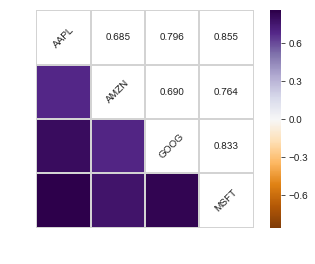

In [113]:
draw_corrplot(tech_rets)

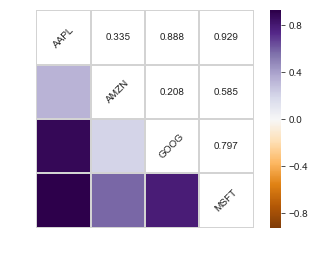

In [114]:
draw_corrplot(closing_df)

In [115]:
rets = tech_rets.dropna()

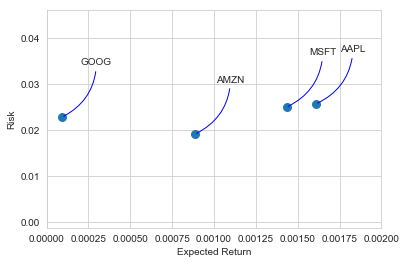

In [143]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.xlim(0, 0.002)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(color='blue', arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

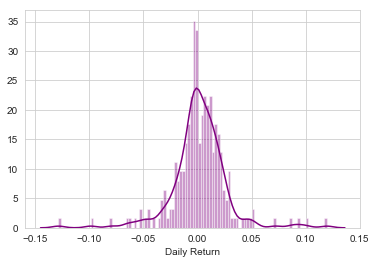

In [144]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [145]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-30,-0.019256,-0.006144,-0.076966,0.006396
2019-05-01,0.049086,-0.007786,-0.017165,-0.020827
2019-05-02,-0.006508,-0.005598,-0.004683,-0.013059
2019-05-03,0.012431,0.032428,0.019602,0.021314
2019-05-06,-0.015443,-0.006069,0.003366,-0.005819


In [146]:
rets['AAPL'].quantile(0.05)

-0.034258428085985886

In [147]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [148]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
        
    return price

In [149]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-29,1289.270020,1266.295044,1274.000000,1287.579956,2499400,1287.579956
2019-04-30,1192.810059,1175.000000,1185.000000,1188.479980,6207000,1188.479980
2019-05-01,1188.050049,1167.180054,1188.050049,1168.079956,2639200,1168.079956
2019-05-02,1174.189941,1155.001953,1167.760010,1162.609985,1944800,1162.609985
2019-05-03,1186.800049,1169.000000,1173.650024,1185.400024,1980700,1185.400024


Text(0.5,1,'Monte Carlo Analysis for Google')

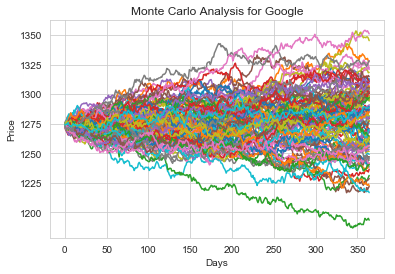

In [151]:
start_price = 1274.00

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [153]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5,1,u'Final price distribution for Google Stock after 365 days')

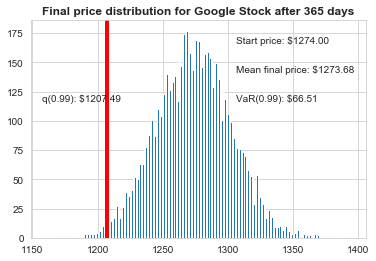

In [154]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')